In [1]:
import os
import numpy as np
import tensorflow as tf
from scipy import misc, stats
from random import sample
from glob import glob

from matplotlib import pyplot as plt

from utils import rescale, max_shape, image_path

In [2]:
# Function to call the model and plot the image with its guess
def is_sushi(image_file):
    image = rescale(misc.imread(image_file, mode='L'), max_shape=max_shape)
    x_image = image.reshape(1, max_shape[0], max_shape[1], 1)
    
    logit = sess.run(logits, feed_dict={X: x_image, y: np.array([-1]).reshape(1, 1), keep_prob: 1})[0][0]
    
    p_sushi = 1 / (1 + np.exp(-logit))
    
    if p_sushi > 0.8:
        title = "It's sushi! ({0:.0f}% sure)".format(p_sushi * 100)
    elif p_sushi >= 0.5 and p_sushi < 0.8:
        title = "Is it sushi...? ({0:.0f}% sure)".format(p_sushi * 100)
    elif p_sushi < 0.5 and p_sushi > 0.2:
        title = "Is it a sandwich...? ({0:.0f}% sure)".format((1-p_sushi) * 100)
    else:  #p_sushi < 0.2:
        title = "It's a sandwich! ({0:.0f}% sure)".format((1-p_sushi) * 100)
    
    plt.imshow(misc.imread(image_file))
    plt.title(title)
    plt.show()

Load the Tensorflow model and the sample images
--
(works with any image)

In [3]:
sess = tf.Session()

loader = tf.train.import_meta_graph('model.meta')
loader.restore(sess, tf.train.latest_checkpoint('./'))
X, y, keep_prob, logits = tf.get_collection('test')[:4]

image_files = glob(image_path % "sushi") + glob(image_path % "sandwich")


Loop to guess what images are
--

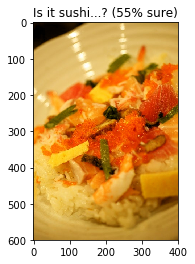

Try again? [y|n]y


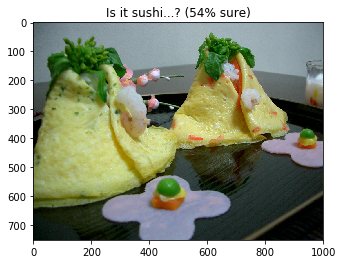

Try again? [y|n]y


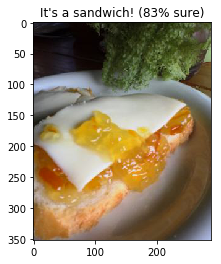

Try again? [y|n]n


In [4]:
try_again = True
while try_again:
    is_sushi(sample(image_files, 1)[0])
    try_again = input("Try again? [y|n]") == 'y'